Data Preprocessing and Model Building

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import json

# Load and preprocess data
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = data_gen.flow_from_directory('C:/Users/Swapnil/Pictures/Swapnil/Prodigy Infotech Internship/Task-5/Fast Food Classification V2/Train', target_size=(224, 224), batch_size=32, subset='training')
val_data = data_gen.flow_from_directory('C:/Users/Swapnil/Pictures/Swapnil/Prodigy Infotech Internship/Task-5/Fast Food Classification V2/Valid', target_size=(224, 224), batch_size=32, subset='validation')

# Get the number of classes
num_classes = len(train_data.class_indices)

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=20, validation_data=val_data)

# Save the model and the class indices
model.save('food_recognition_model.h5')
with open('class_indices.json', 'w') as f:
    json.dump(train_data.class_indices, f)


Found 12000 images belonging to 10 classes.
Found 700 images belonging to 10 classes.


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 96/375 ━━━━━━━━━━━━━━━━━━━━ 8:38 2s/step - accuracy: 0.1029 - loss: 2.6754

c:\Python311\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


375/375 ━━━━━━━━━━━━━━━━━━━━ 667s 2s/step - accuracy: 0.1463 - loss: 2.3773 - val_accuracy: 0.3371 - val_loss: 1.8637
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 559s 1s/step - accuracy: 0.3611 - loss: 1.8411 - val_accuracy: 0.3829 - val_loss: 1.7977
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 568s 2s/step - accuracy: 0.5293 - loss: 1.3811 - val_accuracy: 0.4929 - val_loss: 1.5396
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step - accuracy: 0.7791 - loss: 0.7078 - val_accuracy: 0.4586 - val_loss: 2.0153
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 593s 2s/step - accuracy: 0.9511 - loss: 0.1755 - val_accuracy: 0.4957 - val_loss: 2.9055
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 575s 2s/step - accuracy: 0.9798 - loss: 0.0795 - val_accuracy: 0.4643 - val_loss: 3.3048
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.9882 - loss: 0.0620 - val_accuracy: 0.4800 - val_loss: 3.8681
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 588s 2s/step - accuracy: 0.9953 - loss: 0.0243 - val_accuracy: 0.477

Calorie Estimation

In [2]:
food_to_calories = {
    'Baked Potato': 93,
    'Burger': 295,
    'Crispy Chicken': 377,
    'Donut': 220,
    'Fries': 312,
    'Hot Dog': 290,
    'Pizza': 266,
    'Sandwich': 361,
    'Taco': 226,
    'Taquito': 275,
    #Food items and their calorie content
}

def estimate_calories(food_item):
    return food_to_calories.get(food_item, "Unknown")


Prediction and Usage

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
The recognized food item is Burger with an estimated calorie content of 295 kcal.


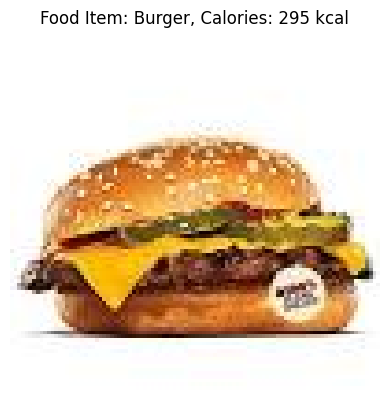

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import json
import matplotlib.pyplot as plt

# Load the model and class indices
model = load_model('food_recognition_model.h5')
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)
    class_labels = {v: k for k, v in class_indices.items()}

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Function to predict the food item and estimate calories
def predict_food_and_calories(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    food_item = class_labels[predicted_class]
    calories = estimate_calories(food_item)
    return food_item, calories

# Example usage
img_path = 'C:/Users/Swapnil/Pictures/Swapnil/Prodigy Infotech Internship/Task-5/Fast Food Classification V2/Test/Burger/Burger-Test (2).jpeg'
food_item, calories = predict_food_and_calories(img_path)
print(f"The recognized food item is {food_item} with an estimated calorie content of {calories} kcal.")

# Display the image with the prediction
def show_image_with_prediction(img_path, food_item, calories):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Food Item: {food_item}, Calories: {calories} kcal')
    plt.show()

show_image_with_prediction(img_path, food_item, calories)
